In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [5]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("^DJI.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:20])

df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 8/7/2019 to 8/7/2020
Data columns (total 6 columns):
symbol    508 non-null object
open      508 non-null float64
high      508 non-null float64
low       508 non-null float64
close     508 non-null float64
volume    508 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 27.8+ KB

number of different stocks:  2
['GSPC', 'DJI']


symbol         open         high          low        close  \
date                                                                  
1/7/2020   GSPC  3105.919922  3128.439941  3101.169922  3115.860107   
2/7/2020   GSPC  3143.639893  3165.810059  3124.520020  3130.010010   
6/7/2020   GSPC  3155.290039  3182.590088  3155.290039  3179.719971   
7/7/2020   GSPC  3166.439941  3184.149902  3142.929932  3145.320068   
8/7/2020   GSPC  3153.070068  3171.800049  3136.530029  3169.939941   

              volume  
date                  
1/7/2020  4443130000  
2/7/2020  4190830000  
6/7/2020  4736450000  
7/7/2020  4563700000  
8/7/2020  2390189825

In [7]:
df.head()

symbol         open         high          low        close  \
date                                                                   
8/7/2019     DJI  26835.64063  26839.14063  26744.86914  26806.14063   
9/7/2019     DJI  26725.11914  26807.69922  26665.57031  26783.49023   
10/7/2019    DJI  26851.96094  26983.44922  26813.10938  26860.19922   
11/7/2019    DJI  26950.16016  27088.44922  26916.32031  27088.08008   
12/7/2019    DJI  27139.49023  27333.78906  27135.44922  27332.02930   

              volume  
date                  
8/7/2019   214290000  
9/7/2019   218330000  
10/7/2019  207990000  
11/7/2019  252300000  
12/7/2019  248390000

In [8]:
df.tail()

symbol         open         high          low        close  \
date                                                                  
1/7/2020   GSPC  3105.919922  3128.439941  3101.169922  3115.860107   
2/7/2020   GSPC  3143.639893  3165.810059  3124.520020  3130.010010   
6/7/2020   GSPC  3155.290039  3182.590088  3155.290039  3179.719971   
7/7/2020   GSPC  3166.439941  3184.149902  3142.929932  3145.320068   
8/7/2020   GSPC  3153.070068  3171.800049  3136.530029  3169.939941   

              volume  
date                  
1/7/2020  4443130000  
2/7/2020  4190830000  
6/7/2020  4736450000  
7/7/2020  4563700000  
8/7/2020  2390189825

In [9]:
df.shape

(508, 6)

In [10]:
series = df['close'].values.reshape(-1, 1)
series

array([[26806.14063 ],
       [26783.49023 ],
       [26860.19922 ],
       [27088.08008 ],
       [27332.0293  ],
       [27359.16016 ],
       [27335.63086 ],
       [27219.84961 ],
       [27222.9707  ],
       [27154.19922 ],
       [27171.90039 ],
       [27349.18945 ],
       [27269.9707  ],
       [27140.98047 ],
       [27192.44922 ],
       [27221.34961 ],
       [27198.01953 ],
       [26864.26953 ],
       [26583.41992 ],
       [26485.00977 ],
       [25717.74023 ],
       [26029.51953 ],
       [26007.07031 ],
       [26378.18945 ],
       [26287.43945 ],
       [25896.43945 ],
       [26279.91016 ],
       [25479.41992 ],
       [25579.39063 ],
       [25886.00977 ],
       [26135.78906 ],
       [25962.43945 ],
       [26202.73047 ],
       [26252.24023 ],
       [25628.90039 ],
       [25898.83008 ],
       [25777.90039 ],
       [26036.09961 ],
       [26362.25    ],
       [26403.2793  ],
       [26118.01953 ],
       [26355.4707  ],
       [26728.15039 ],
       [267

In [11]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

### **Approach 1 --> Predict Stock Prices**


In [12]:
# Windows of length 10, next value being the target
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (498, 10, 1) Y.shape (498,)


**Training an LSTM model**

In [13]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
8/8 [==============================] - 0s 53ms/step - loss: 2.3207 - val_loss: 68.8621
Epoch 2/80
8/8 [==============================] - 0s 9ms/step - loss: 1.6479 - val_loss: 48.3682
Epoch 3/80
8/8 [==============================] - 0s 9ms/step - loss: 1.2550 - val_loss: 32.2964
Epoch 4/80
8/8 [==============================] - 0s 9ms/step - loss: 1.0126 - val_loss: 20.7330
Epoch 5/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8670 - val_loss: 11.8743
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.7405 - val_loss: 6.2401
Epoch 7/80
8/8 [==============================] - 0s 9ms/step - loss: 0.6653 - val_loss: 3.5972
Epoch 8/80
8/8 [==============================] - 0s 9ms/step - loss: 0.5965 - val_loss: 1.6324
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 0.6140 - val_loss: 0.6597
Epoch 10/80
8/8 [==============================] - 0s 8ms/step - loss: 0.5996 - val_loss: 0.5584
Epoch 11/80
8/8 [==============

**Plotting Loss Per Iteration**

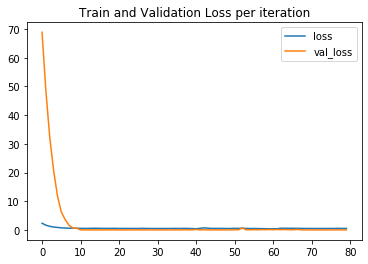

In [14]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss per iteration")
plt.legend()
plt.show()

**One-Step Forecast**

(498, 1)


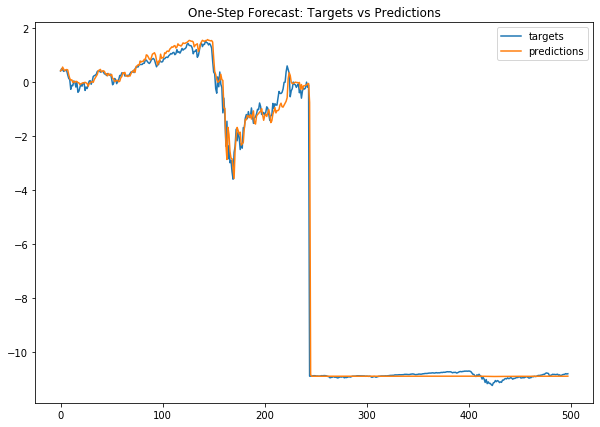

In [15]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-Step Forecast: Targets vs Predictions")
plt.legend()
plt.show()

**For one step forecast, this model is preforming really well. Now we'll try multi-step forecast**

**Multi-step forecast**

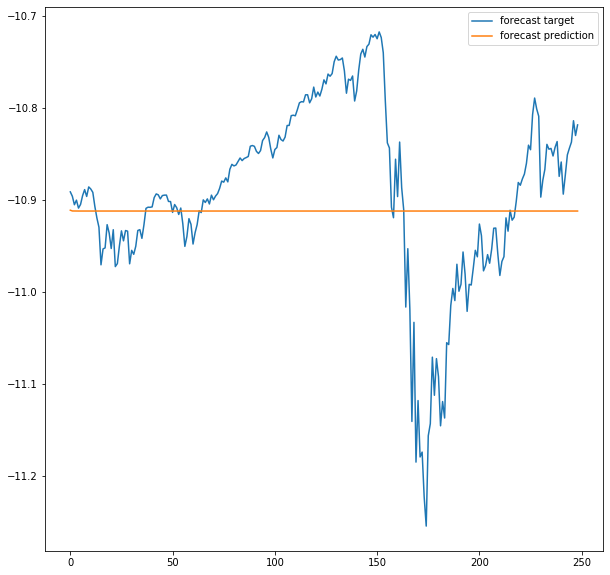

In [16]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.figure(figsize = (10,10))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

**For a multi-step forecast, the forecast is a straight line. The model is not predicting the next value, it's just copying the previous value that was its own output.**

### **Second Approach --> Predict Stock Returns**

**Stock Return is calculated as follows:**

(final price - initial price)/(initial price)

In [17]:
df['PrevClose'] = df['close'].shift(1) # move everything up 1
df.head()

symbol         open         high          low        close  \
date                                                                   
8/7/2019     DJI  26835.64063  26839.14063  26744.86914  26806.14063   
9/7/2019     DJI  26725.11914  26807.69922  26665.57031  26783.49023   
10/7/2019    DJI  26851.96094  26983.44922  26813.10938  26860.19922   
11/7/2019    DJI  26950.16016  27088.44922  26916.32031  27088.08008   
12/7/2019    DJI  27139.49023  27333.78906  27135.44922  27332.02930   

              volume    PrevClose  
date                               
8/7/2019   214290000          NaN  
9/7/2019   218330000  26806.14063  
10/7/2019  207990000  26783.49023  
11/7/2019  252300000  26860.19922  
12/7/2019  248390000  27088.08008

In [18]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df.head()

symbol         open         high          low        close  \
date                                                                   
8/7/2019     DJI  26835.64063  26839.14063  26744.86914  26806.14063   
9/7/2019     DJI  26725.11914  26807.69922  26665.57031  26783.49023   
10/7/2019    DJI  26851.96094  26983.44922  26813.10938  26860.19922   
11/7/2019    DJI  26950.16016  27088.44922  26916.32031  27088.08008   
12/7/2019    DJI  27139.49023  27333.78906  27135.44922  27332.02930   

              volume    PrevClose    Return  
date                                         
8/7/2019   214290000          NaN       NaN  
9/7/2019   218330000  26806.14063 -0.000845  
10/7/2019  207990000  26783.49023  0.002864  
11/7/2019  252300000  26860.19922  0.008484  
12/7/2019  248390000  27088.08008  0.009006

**Plot the Stock Returns Histogram**

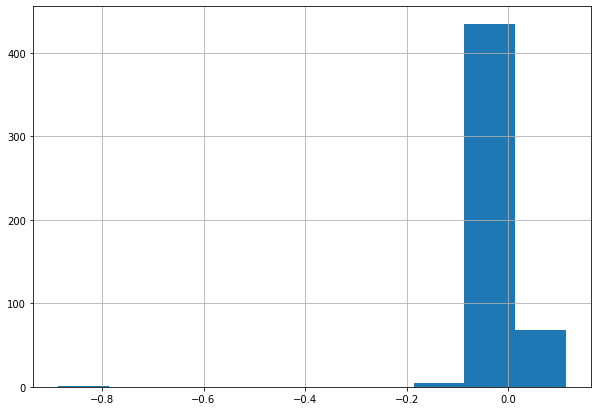

In [19]:
plt.figure(figsize = (10,7))
df['Return'].hist()
plt.show()

In [20]:
series = df['Return'].values[1:].reshape(-1, 1)

**Scale the Data**

In [21]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

**Training the LSTM model**

In [22]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) 
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (497, 10, 1) Y.shape (497,)


In [23]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
8/8 [==============================] - 0s 47ms/step - loss: 7.2277 - val_loss: 0.9030
Epoch 2/80
8/8 [==============================] - 0s 9ms/step - loss: 7.1968 - val_loss: 0.9012
Epoch 3/80
8/8 [==============================] - 0s 9ms/step - loss: 7.1543 - val_loss: 0.9000
Epoch 4/80
8/8 [==============================] - 0s 9ms/step - loss: 7.1406 - val_loss: 0.8889
Epoch 5/80
8/8 [==============================] - 0s 9ms/step - loss: 7.1342 - val_loss: 0.8725
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 7.1255 - val_loss: 0.8691
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 7.1126 - val_loss: 0.8503
Epoch 8/80
8/8 [==============================] - 0s 9ms/step - loss: 7.1085 - val_loss: 0.8645
Epoch 9/80
8/8 [==============================] - 0s 9ms/step - loss: 7.0836 - val_loss: 0.8434
Epoch 10/80
8/8 [==============================] - 0s 9ms/step - loss: 7.0666 - val_loss: 0.8571
Epoch 11/80
8/8 [===================

**Plotting Loss Per Iteration**

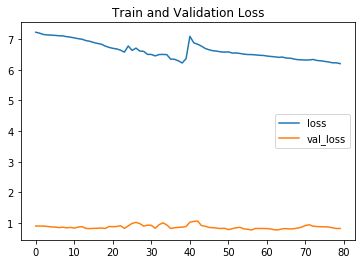

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

**One-Step Forecast of Stock Returns**

(497, 1)


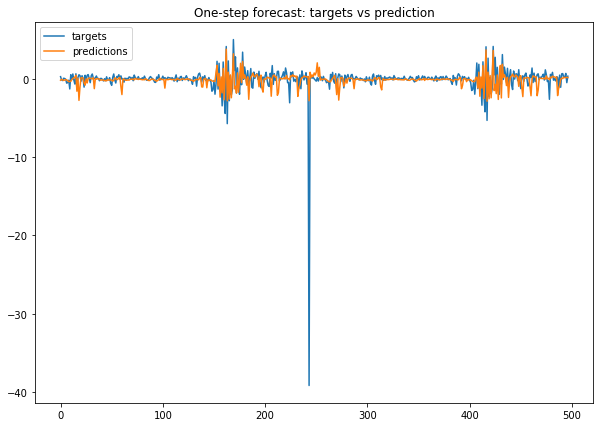

In [25]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]


plt.figure(figsize=(10,7))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("One-step forecast: targets vs prediction")
plt.legend()
plt.show()

**Multi-step Forecast**

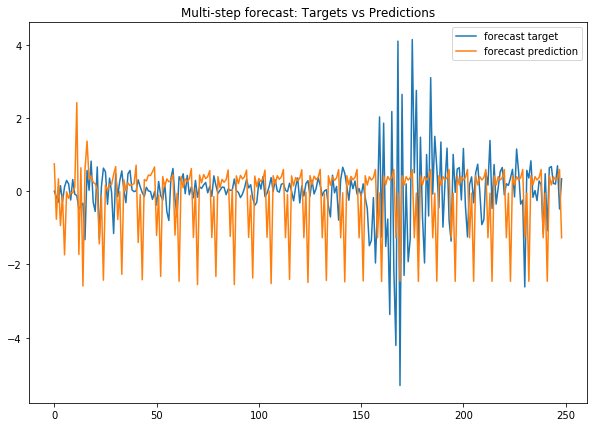

In [26]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.figure(figsize = (10, 7))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.title("Multi-step forecast: Targets vs Predictions")
plt.legend()
plt.show()

### **Third Approach**

1.   Predict whether the price will go up or down
2.   Predict whether the return will be positive or negative






In [27]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [28]:
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g. if T=10 and you have 11 data points then you'd only have 1 sample)

In [29]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [30]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [31]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [32]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

In [33]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
11/11 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.4882 - val_loss: 0.6907 - val_accuracy: 0.5125
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.5651 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.5651 - val_loss: 0.6839 - val_accuracy: 0.5625
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6851 - accuracy: 0.5651 - val_loss: 0.6885 - val_accuracy: 0.5813
Epoch 5/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6874 - accuracy: 0.5651 - val_loss: 0.6943 - val_accuracy: 0.5063
Epoch 6/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6873 - accuracy: 0.5651 - val_loss: 0.6817 - val_accuracy: 0.5813
Epoch 7/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5651 - val_loss: 0.6861 - val_accuracy: 0.5562
Epoch 8/300


Epoch 59/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6819 - accuracy: 0.5710 - val_loss: 0.6818 - val_accuracy: 0.5750
Epoch 60/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.5651 - val_loss: 0.6820 - val_accuracy: 0.5750
Epoch 61/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.5621 - val_loss: 0.6818 - val_accuracy: 0.5688
Epoch 62/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6781 - accuracy: 0.5828 - val_loss: 0.6811 - val_accuracy: 0.5688
Epoch 63/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.5680 - val_loss: 0.6804 - val_accuracy: 0.5688
Epoch 64/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6818 - accuracy: 0.5592 - val_loss: 0.6814 - val_accuracy: 0.5688
Epoch 65/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6838 - accuracy: 0.5592 - val_loss: 0.6807 - val_accuracy: 0.5688
Epoch 

11/11 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.5828 - val_loss: 0.6844 - val_accuracy: 0.5750
Epoch 117/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.5621 - val_loss: 0.6821 - val_accuracy: 0.5688
Epoch 118/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.5888 - val_loss: 0.6822 - val_accuracy: 0.5625
Epoch 119/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6717 - accuracy: 0.5769 - val_loss: 0.6822 - val_accuracy: 0.5562
Epoch 120/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.5917 - val_loss: 0.6823 - val_accuracy: 0.5625
Epoch 121/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.5858 - val_loss: 0.6833 - val_accuracy: 0.5688
Epoch 122/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6766 - accuracy: 0.5592 - val_loss: 0.6832 - val_accuracy: 0.5750
Epoch 123/300

11/11 [==============================] - 0s 9ms/step - loss: 0.6717 - accuracy: 0.5710 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 174/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.5828 - val_loss: 0.6932 - val_accuracy: 0.5312
Epoch 175/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6593 - accuracy: 0.5621 - val_loss: 0.6866 - val_accuracy: 0.5312
Epoch 176/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6580 - accuracy: 0.5828 - val_loss: 0.6858 - val_accuracy: 0.5375
Epoch 177/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6565 - accuracy: 0.5769 - val_loss: 0.6922 - val_accuracy: 0.5188
Epoch 178/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.5888 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 179/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6543 - accuracy: 0.5917 - val_loss: 0.6897 - val_accuracy: 0.4938
Epoch 180/300

11/11 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.5828 - val_loss: 0.6871 - val_accuracy: 0.5250
Epoch 231/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6460 - accuracy: 0.5858 - val_loss: 0.6893 - val_accuracy: 0.5375
Epoch 232/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6448 - accuracy: 0.6095 - val_loss: 0.6870 - val_accuracy: 0.5312
Epoch 233/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6432 - accuracy: 0.6006 - val_loss: 0.6870 - val_accuracy: 0.5250
Epoch 234/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6474 - accuracy: 0.6095 - val_loss: 0.6878 - val_accuracy: 0.5188
Epoch 235/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.5947 - val_loss: 0.6893 - val_accuracy: 0.5312
Epoch 236/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6477 - accuracy: 0.5917 - val_loss: 0.6873 - val_accuracy: 0.5437
Epoch 237/3

11/11 [==============================] - 0s 9ms/step - loss: 0.6448 - accuracy: 0.5888 - val_loss: 0.6863 - val_accuracy: 0.5750
Epoch 288/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6417 - accuracy: 0.5947 - val_loss: 0.6873 - val_accuracy: 0.5500
Epoch 289/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6360 - accuracy: 0.6036 - val_loss: 0.6860 - val_accuracy: 0.5750
Epoch 290/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.6124 - val_loss: 0.6855 - val_accuracy: 0.5813
Epoch 291/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6419 - accuracy: 0.6243 - val_loss: 0.6856 - val_accuracy: 0.5813
Epoch 292/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6371 - accuracy: 0.6213 - val_loss: 0.6848 - val_accuracy: 0.5750
Epoch 293/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.6272 - val_loss: 0.6862 - val_accuracy: 0.5688
Epoch 294/300

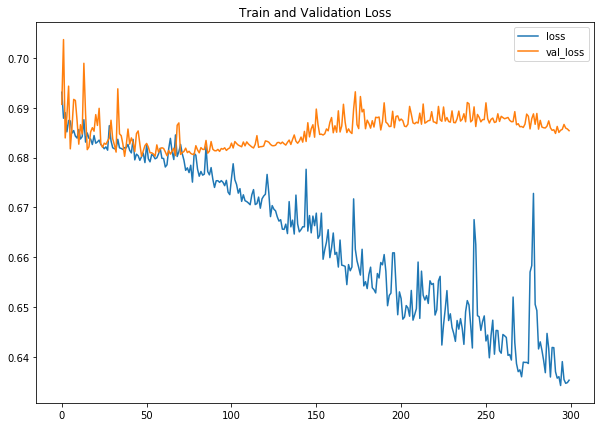

In [34]:
plt.figure(figsize = (10,7))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

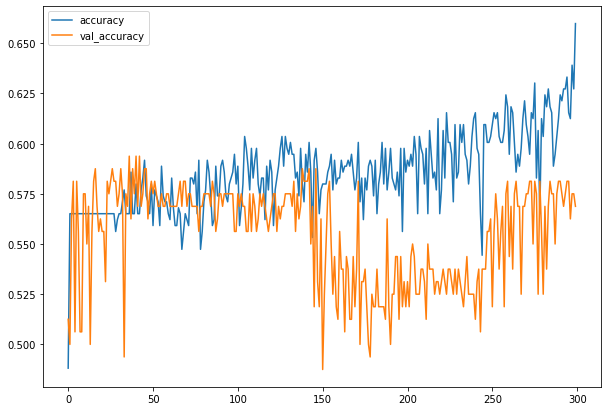

In [35]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### **Summary**:


1.   We saw that one-step ahead predictions are more accurate than the multi-step forecasts.
2.   Stock-price predictions can be modelled fairly accurately if we forecast only one-step ahead.
3.   Stock Returns cannot be modelled with good accuracy for both single-step and multi-step forecasts. 

